##                       * Books Recommender System *

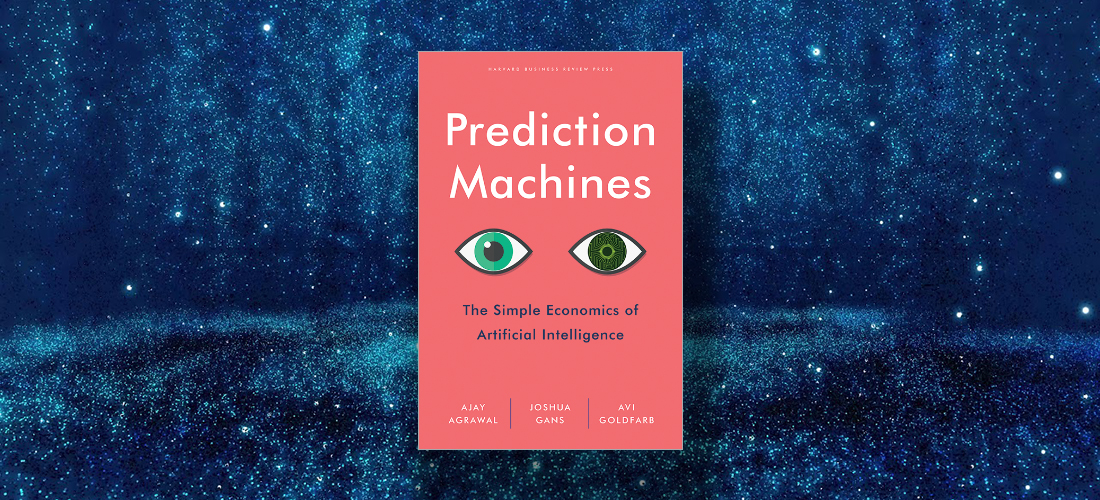

In [1]:
#import random books cover
from IPython import display
display.Image('./book.jpg')

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#we import consine_similarity  to measure documents similarity in text analyis
from sklearn.metrics.pairwise import cosine_similarity

### Import file (download from kaggle)

In [3]:
books = pd.read_csv('Books.csv')
user = pd.read_csv('Users.csv')
rating = pd.read_csv('Ratings.csv')

C:\Users\91808\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [5]:
rating.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [6]:
user.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


### Checking the shape of the all data

In [7]:
print(books.shape)
print(user.shape)
print(rating.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


### checking the null value 

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

### Merge Rating and books on ISBN

In [11]:
rating.merge(books , on = 'ISBN').shape

(1031136, 10)

In [12]:
rating_with_name = rating.merge(books , on ='ISBN')

## Start building model for books recommendation

In [13]:
R_name = rating_with_name 

In [14]:
R_name.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


###  My main focus on book title and book rating from these two we build our model that will predict books name

In [15]:
num_rating = R_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [16]:
num_rating.rename(columns={'Book-Rating': 'Number-Rating'}, inplace =True)
num_rating.head(5)

,Book-Title,Number-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [17]:
rating.merge(books , on = 'ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [18]:
avg_rating =R_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns ={'Book-Rating': 'Avg_Rating'},inplace =True)
avg_rating.head(5)

,Book-Title,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [19]:
pop_df = num_rating.merge(avg_rating , on ='Book-Title')
pop_df

,Book-Title,Number-Rating,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [20]:
pop_df =pop_df.sort_values(by='Avg_Rating',ascending = True)
pop_df.head(5)

,Book-Title,Number-Rating,Avg_Rating
200246,The Not-So-Great Escape (McGee and Me! #03 Book),2,0.0
200260,The Notebooks of Leonardo Da Vinci (Volume 2),1,0.0
200264,The Nothing,1,0.0
200265,The Nothing Man,1,0.0
200266,The Nothing That Is: A Natural History of Zero,2,0.0


####  I choose  book whose rating number more than and equal to  250 

In [21]:
pop_df = pop_df[pop_df['Number-Rating']>=250].sort_values('Number-Rating',ascending = False)


In [22]:
pop_df

,Book-Title,Number-Rating,Avg_Rating
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193
...,...,...,...
99972,Kiss the Girls,256,2.828125
178265,The Blind Assassin,255,3.007843
67832,Flesh and Blood,254,2.775591
144165,Prodigal Summer: A Novel,253,4.450593


In [23]:
final_popular =pop_df.merge(books , on ='Book-Title').drop_duplicates('Book-Title')

In [24]:
final_popular.head(5)

,Book-Title,Number-Rating,Avg_Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Wild Animus,2502,1.019584,0971880107,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,The Lovely Bones: A Novel,1295,4.468726,0316666343,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,The Da Vinci Code,898,4.642539,0385504209,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
8,A Painted House,838,3.231504,044023722X,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
13,The Nanny Diaries: A Novel,828,3.530193,0312278586,Emma McLaughlin,2002,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...


## Collaborate Filtering Based Recommender System

In [25]:
x = R_name.groupby('User-ID').count()['Book-Rating']>200
high_rating_users = x[x].index

In [26]:
filter_rating = R_name[R_name['User-ID'].isin(high_rating_users)]

In [27]:
y = filter_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [28]:
final_rating = filter_rating[filter_rating['Book-Title'].isin(famous_books)]

In [29]:
pivot = final_rating.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [30]:
pivot.fillna(0 ,inplace = True)

In [31]:
pivot.head(3)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#pivot.index[:2]

In [33]:
similarity_score = cosine_similarity(pivot)
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [34]:
similarity_score.shape

(706, 706)

In [35]:
def sujhaao(book_name):
    #index_fatch
    index = np.where(pivot.index==book_name)[0][0]
    similar_items =sorted(list(enumerate(similarity_score[index])),key =lambda x:x[1],reverse =True)[1:6]
    for i in similar_items:
        print(pivot.index[i[0]])

In [36]:
sujhaao('2nd Chance')

Four Blind Mice
The Next Accident
Violets Are Blue
The Murder Book
Flesh and Blood
